# How well do jobs and skills pay for Data Analysts?

In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast
import seaborn as sns

#Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Cleaning Data
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\Mihai\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df_RO = df[df['job_country'] == 'Romania'].dropna(subset=['salary_year_avg'])
df_RO.sample(3)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
260785,Senior Data Analyst,Senior Product Manager (Data Products),Romania,via Ai-Jobs.net,Full-time,False,Romania,2023-12-20 07:28:53,True,False,Romania,year,86400.0,NaN,Snyk,None,None
631039,Data Scientist,Data Strategist,"Cluj-Napoca, Romania",via Ai-Jobs.net,Full-time,False,Romania,2023-02-28 12:30:24,True,False,Romania,year,80850.0,NaN,ComplyAdvantage,"[excel, spreadsheet]","{'analyst_tools': ['excel', 'spreadsheet']}"
767672,Senior Data Engineer,Senior Data Engineer,"Bucharest, Romania",via Ai-Jobs.net,Full-time,False,Romania,2023-04-25 01:29:53,False,False,Romania,year,147500.0,NaN,ExpressVPN,"[sql, python, go, snowflake, aws, redshift, bi...","{'analyst_tools': ['tableau'], 'cloud': ['snow..."


In [7]:
job_titles = df_RO['job_title_short'].value_counts().head(6).index.tolist()
job_titles

['Data Analyst',
 'Data Scientist',
 'Data Engineer',
 'Senior Data Analyst',
 'Software Engineer',
 'Machine Learning Engineer']

In [8]:
df_RO_top6 = df_RO[df_RO['job_title_short'].isin(job_titles)]

In [11]:
job_order = df_RO_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index
job_order

Index(['Machine Learning Engineer', 'Software Engineer', 'Data Scientist',
       'Senior Data Analyst', 'Data Engineer', 'Data Analyst'],
      dtype='object', name='job_title_short')

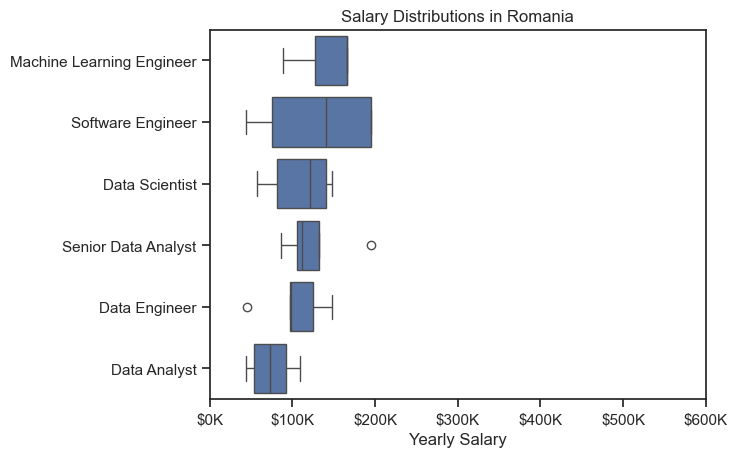

In [12]:
sns.boxplot(data=df_RO_top6, x='salary_year_avg',y='job_title_short',order=job_order)
sns.set_theme(style='ticks')

plt.title('Salary Distributions in Romania')
plt.xlabel('Yearly Salary')
plt.ylabel('')
plt.xlim(0,600_000)
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

# Investigate Median Salary Vs Skill for Data Analysts

In [14]:
df_DA_RO = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'Romania')].copy()
df_DA_RO = df_DA_RO.dropna(subset=['salary_year_avg'])

In [15]:
df_DA_RO = df_DA_RO.explode('job_skills')

df_DA_RO[['salary_year_avg','job_skills']].head(5)

,salary_year_avg,job_skills
162997,43200.0,sql
162997,43200.0,python
162997,43200.0,sap
174496,89100.0,spark
174496,89100.0,sap


In [21]:
df_DA_top_pay = df_DA_RO.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values('median',ascending=False)
df_DA_top_pay = df_DA_top_pay.head(10)
df_DA_top_pay

,count,median
job_skills,,
javascript,1,109120.0
tableau,1,109120.0
oracle,1,100500.0
azure,1,89100.0
sap,5,89100.0
spark,4,89100.0
sql,4,71057.0
excel,5,56700.0
powerpoint,1,56700.0


In [27]:
df_DA_skills = df_DA_RO.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by = 'count',ascending=False)
df_DA_skills = df_DA_skills.head(10).sort_values('median',ascending=False)
df_DA_skills

,count,median
job_skills,,
javascript,1,109120.0
oracle,1,100500.0
sap,5,89100.0
spark,4,89100.0
azure,1,89100.0
sql,4,71057.0
excel,5,56700.0
vba,3,56700.0
go,2,52014.0


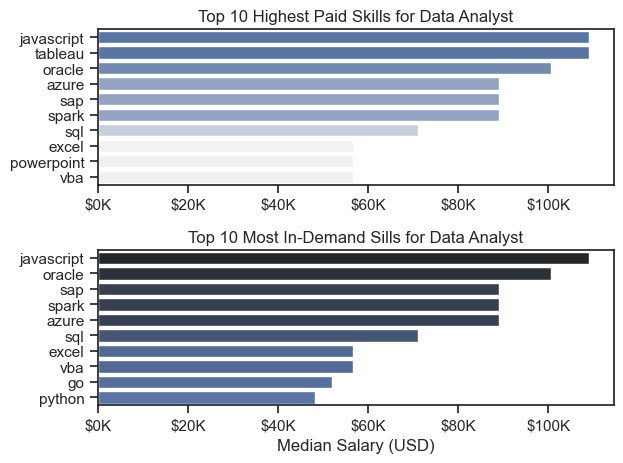

In [29]:
fig,ax = plt.subplots(2,1)

sns.set_theme(style='ticks')

#df_DA_top_pay[::-1].plot(kind='barh',y='median',ax=ax[0], legend = False)
sns.barplot(data=df_DA_top_pay,x='median',y=df_DA_top_pay.index,ax=ax[0], hue = 'median',palette='light:b')

ax[0].set_title('Top 10 Highest Paid Skills for Data Analyst')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos : f'${int(x/1000)}K'))
ax[0].legend().remove()


#df_DA_skills[::-1].plot(kind='barh',y='median',ax=ax[1],legend=False)
sns.barplot(data=df_DA_skills,x='median',y=df_DA_skills.index,ax=ax[1],hue = 'median',palette='dark:b_r')

ax[1].set_title('Top 10 Most In-Demand Sills for Data Analyst')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos : f'${int(x/1000)}K'))
ax[1].legend().remove()

fig.tight_layout()
plt.show()